In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [86]:
lines = []
with open("shrek.txt") as f:
    for line in f:
        lines.append(line[:-1].strip())

In [87]:
lines = lines[1:]

In [88]:
# Read the shrek lines

shrek_lines = []
shrek_flag = False
shrek_line = ""
for line in lines:
    if shrek_flag:
        if line != '' and line[0] != '(':
            shrek_line += " " + line
        else:
            shrek_lines.append(shrek_line.strip())
            shrek_flag = False
            shrek_line = ""
    elif line == "SHREK":
        shrek_flag = True

shrek_lines = [l for l in shrek_lines if l != '']

In [89]:
# Remove the parenthticals from the lines

cleaned_lines = []
par_flag = False
for line in shrek_lines:
    l = ""
    for word in line.split():
        if word[0] == '(':
            par_flag = True
        if not par_flag:
            l += " " + word
        else:
            if word[-1] == ')':
                par_flag = False
    cleaned_lines.append(l.strip())

In [90]:
shrek_lens = np.array([len(l.split()) for l in shrek_lines])

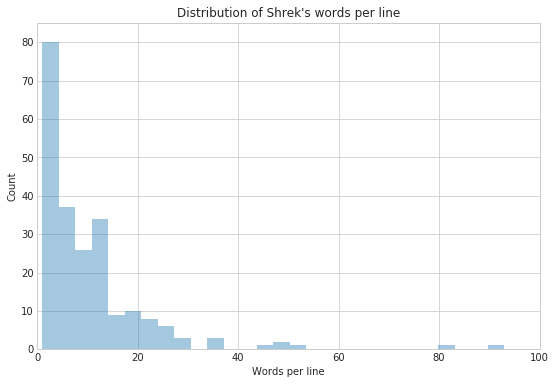

In [97]:
plt.figure(figsize=(9,6));
sns.distplot(shrek_lens, kde=False);
plt.xlim(0, 100);
plt.ylim(0, 85);
plt.xlabel('Words per line');
plt.ylabel('Count');
plt.title('Distribution of Shrek\'s words per line');
plt.savefig('./shrek_dist.png', dpi=100)

/home/mgray/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  """Entry point for launching an IPython kernel.


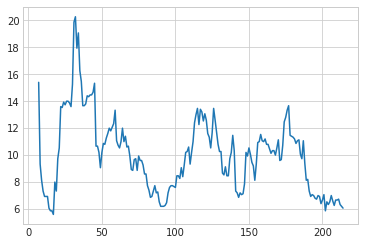

In [92]:
plt.plot(pd.rolling_mean(shrek_lens, 15, center=True));